In [1]:
import os
import sys
import json
from PIL import Image, ImageDraw,ImageFont
import glob
from google.cloud import vision
import io
client = vision.ImageAnnotatorClient()


In [2]:
nb_dir = '/'.join(os.getcwd().split('/')[:-1])
sys.path.append(nb_dir)
sys.path.append(os.path.split(nb_dir)[0])

import config
import src.utilities.app_context as app_context
app_context.init()

#path to craft model, weight can be pulled form the production bracnh of repo
#config.CRAFT_MODEL_PATH= nb_dir + '/utilities/craft_pytorch/model/craft_mlt_25k.pth'
#config.CRAFT_REFINE_MODEL_PATH = nb_dir + '/utilities/craft_pytorch/model/craft_refiner_CTW1500.pth'

In [3]:
from src.services.main import GoogleVisionOCR

In [39]:
#base_dir = '/home/dhiraj/Documents/Anuwad/anuvaad/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/input'
base_dir   = os.getcwd()+'/upload/'
#base_dir  = "/home/naresh/Tarento/anuvaad/anuvaad-etl/anuvaad-extractor/document-processor/ocr/google/upload/"
filename    = 'RTIOrder_hi.pdf'

#filename    = 'hamlet_1.pdf'
file_format = 'PDF'
language    =  'en'

In [40]:
app_context.application_context = {
  "input":{
  "inputs": [
    {
      "file": {
        "identifier": "string",
        "name": filename,
        "format": file_format
      },
      "config": {
        "OCR": {
          "option": "HIGH_ACCURACY",
          "language": language
        }
      }
}
  ]
}}

In [41]:
resp = GoogleVisionOCR(app_context)

[2021-01-06 20:17:03,496] {loghandler.py:48} MainThread DEBUG in loghandler: google vision ocr process starting {'input': {'inputs': [{'file': {'identifier': 'string', 'name': 'RTIOrder_hi.pdf', 'format': 'PDF'}, 'config': {'OCR': {'option': 'HIGH_ACCURACY', 'language': 'en'}}}]}}
[2021-01-06 20:17:03,502] {loghandler.py:20} MainThread INFO in loghandler: image extraction started ===>
[2021-01-06 20:17:03,510] {loghandler.py:20} MainThread INFO in loghandler: created processing directories successfully upload/RTIOrder_hi_4b4f6d48-1b04-46ff-8cef-7193e23a5790
[2021-01-06 20:17:03,517] {loghandler.py:20} MainThread INFO in loghandler: filepath upload/RTIOrder_hi.pdf, working_dir upload/RTIOrder_hi_4b4f6d48-1b04-46ff-8cef-7193e23a5790
[2021-01-06 20:17:04,228] {loghandler.py:20} MainThread INFO in loghandler: Extraction of images from upload/RTIOrder_hi.pdf completed in 0.7110919952392578
[2021-01-06 20:17:16,559] {loghandler.py:20} MainThread INFO in loghandler: successfully completed goo

In [42]:
file_index = 0
page_index = 0
#filepath = '/home/naresh/Tarento/anuvaad2/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/sample-data/class1/test_children_023985fa-28d9-11eb-8434-38baf82f7425/images/test_children0001-1.jpg'

save_dir = '/home/naresh/Tarento/testing_document_processor/test_google_vision/draw_result'
#resp['rsp']['outputs'][file_index]['pages'][page_index]['words'][0]

def draw_box(resp,filepath,save_dir,page_idx,color="red", save=False):
    image  = Image.open(filepath)
    draw   = ImageDraw.Draw(image)
    for i in resp['rsp']['outputs'][0]['pages'][page_idx]['lines']:
        #font = ImageFont.truetype("sans-serif.ttf", 30)
        #draw.text((10, 10),thresh,(255,0,255))
        #print("kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk",i)
        draw.rectangle(((i['boundingBox']['vertices'][0]['x'], i['boundingBox']['vertices'][0]['y']), (i['boundingBox']['vertices'][2]['x'],i['boundingBox']['vertices'][2]['y'])), outline=color,width=5)
        
    
    save_filepath = os.path.join(save_dir, "bbox_vision_"+os.path.basename(filepath))
    if save:
        image.save(save_filepath)
    
    return image

In [43]:
for idx,page in enumerate(resp['rsp']['outputs'][0]['page_info']):
    image = draw_box(resp,page,save_dir,idx ,color="blue", save=True) 

#  google vision

In [22]:
import io
from google.cloud import vision
client = vision.ImageAnnotatorClient()

path = '/home/naresh/Tarento/anuvaad2/anuvaad-etl/anuvaad-extractor/block-merger/src/notebooks/1.jpg'
with io.open(path, 'rb') as image_file:
    content = image_file.read()
#img = cv2.imread(path)
image = vision.types.Image(content=content)
response = client.document_text_detection(image=image)
def get_document_bounds(response):
    bounds=[]
    for i,page in enumerate(response.pages):
        print(page.property.detected_languages[0].language_code)
        for block in page.blocks:
            #bounds.append(block.bounding_box)
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {})'.format(
                        word_text))
                    if len(word.symbols[0].property.detected_languages)!=0:
                        print(word.symbols[0].property.detected_languages[0].language_code)
                    
                        
                    #.symbols.property.detected_languages.language_code

                    
        #print(page)
#                    for symbol in word.symbols:
                    #bounds.append(word.bounding_box)
    return bounds
bounds = get_document_bounds(response.full_text_annotation)


[2020-12-01 12:41:07,223] {_default.py:181} MainThread DEBUG in _default: Checking /home/naresh/Tesseract/google_vision/anuvaad-f7a059c268e4.json for explicit credentials as part of auth process...
[2020-12-01 12:41:07,693] {requests.py:181} Thread-6 DEBUG in requests: Making request: POST https://oauth2.googleapis.com/token
en
Word text: PARTA)
cs
Word text: А)
Word text: Background)
en
Word text: of)
en
Word text: the)
en
Word text: dispute)
en
Word text: 1)
Word text: .)
Word text: A)
en
Word text: quest)
en
Word text: for)
en
Word text: equality)
en
Word text: of)
en
Word text: opportunity)
en
Word text: for)
en
Word text: women)
en
Word text: seeking)
en
Word text: Permanent)
en
Word text: Commissions)
en
Word text: in)
en
Word text: the)
en
Word text: Indian)
en
Word text: Army)
en
Word text: forms)
en
Word text: the)
en
Word text: basis)
en
Word text: of)
en
Word text: these)
en
Word text: appeals)
en
Word text: .)
en
Word text: The)
en
Word text: lead)
en
Word text: appeal)
en


In [47]:
#resp for line extraction
breaks = vision.enums.TextAnnotation.DetectedBreak.BreakType
paragraphs = []
lines = []
coord = []
filepath = '/home/naresh/anuvaad/anuvaad-etl/anuvaad-extractor/document-processor/word-detector/craft/upload/dict_16_734c4994-f4a9-4948-989f-e940fa802eea/images/dict_160001-1.jpg'
with io.open(filepath, 'rb') as image_file:
    content = image_file.read()
#img = cv2.imread(path)
image = vision.types.Image(content=content)
annotation = client.document_text_detection(image=image)
for page in annotation.full_text_annotation.pages:
    
    for block in page.blocks:
        
        for paragraph in block.paragraphs:
            line_coord = []
            para = ""
            line = ""
            top_left_x =sys.maxsize ;top_left_y =sys.maxsize; top_right_x = -1;top_right_y = sys.maxsize;
            bottom_left_x =sys.maxsize;bottom_left_y =-1  ; bottom_right_x =-1;bottom_right_y =-1
            for word in paragraph.words:
                for symbol in word.symbols:
                    line += symbol.text
                    top_left_x = min(top_left_x,symbol.bounding_box.vertices[0].x);top_left_y = min(top_left_y,symbol.bounding_box.vertices[0].y)
                    top_right_x = max(top_right_x,symbol.bounding_box.vertices[1].x);top_right_y = min(top_right_y,symbol.bounding_box.vertices[1].y)
                    bottom_left_x = min(bottom_left_x,symbol.bounding_box.vertices[3].x);bottom_left_y = max(bottom_left_y,symbol.bounding_box.vertices[3].y)
                    bottom_right_x = max(bottom_right_x,symbol.bounding_box.vertices[2].x);bottom_right_y = max(bottom_right_y,symbol.bounding_box.vertices[2].y)
                     #if symbol.property.detected_break.type == breaks.SPACE:
#                         line += ' '
                    #print(type(symbol.property.detected_break.type))
                    #if symbol.property.detected_break.type == 5:
                        #print("kkkkkkkkkk")
                    if symbol.property.detected_break.type == breaks.SPACE or symbol.property.detected_break.type == breaks.EOL_SURE_SPACE or  symbol.property.detected_break.type == breaks.HYPHEN:
                        line += ' '
                        lines_coord = []
                        lines.append(line)
                        lines_coord.append({'x':top_left_x,'y':top_left_y});lines_coord.append({'x':top_right_x,'y':top_right_y})
                        lines_coord.append({'x':bottom_right_x,'y':bottom_right_y});lines_coord.append({'x':bottom_left_x,'y':bottom_left_y})
                        line_coord.append(lines_coord)
                        para += line
                        line = ''
                        top_left_x =sys.maxsize ;top_left_y =sys.maxsize; top_right_x = -1;top_right_y = sys.maxsize;
                        bottom_left_x =sys.maxsize;bottom_left_y =-1  ; bottom_right_x =-1;bottom_right_y =-1
                    if symbol.property.detected_break.type == breaks.LINE_BREAK:
                        lines.append(line)
                        para += line
                        lines_coord = []
                        lines_coord.append({'x':top_left_x,'y':top_left_y});lines_coord.append({'x':top_right_x,'y':top_right_y})
                        lines_coord.append({'x':bottom_right_x,'y':bottom_right_y});lines_coord.append({'x':bottom_left_x,'y':bottom_left_y})
                        line_coord.append(lines_coord)
                        lines.append(line)
                        line = ''
                        top_left_x =sys.maxsize ;top_left_y =sys.maxsize; top_right_x = -1;top_right_y = sys.maxsize;
                        bottom_left_x =sys.maxsize;bottom_left_y =-1  ; bottom_right_x =-1;bottom_right_y =-1
        
            paragraphs.append(para)
            coord.append(line_coord)

In [59]:
for i in paragraphs:
    print(i)
    print("kkkkkkkkkkkkkkkkkkkkkkkkkkk")

9
kkkkkkkkkkkkkkkkkkkkkkkkkkk
Accountable
kkkkkkkkkkkkkkkkkkkkkkkkkkk
Accrue Accountable लेखादायी देनदार
kkkkkkkkkkkkkkkkkkkkkkkkkkk
Accounts of the assessee have been made AccountableIAnswerableजवाबदार
kkkkkkkkkkkkkkkkkkkkkkkkkkk
upto a date लेखे किसी तारीख तक के लिए तैयार Accountable | Llable (to pay) देनदार लेखादेय; किए गए हैं , निर्धारिती के आअ ३(ख) उत्तरदायी, जिम्मेवार; मदयून
kkkkkkkkkkkkkkkkkkkkkkkkkkk
Accounts office, audit and लेखा और लेखापरीक्षा Accountable जबाबदार पूविअ १४; उत्तरदायी, जिम्मेवार कार्यालय Accountable or liable लेखादायी, दायित्वाधीन या Accounts officer गणनाधिकारी (शाश) कंअ५४३ (१)(क)
kkkkkkkkkkkkkkkkkkkkkkkkkkk
Accounts shall be audited लेखाओं की संपरीक्षा Accountable person लेखादायी व्यक्ति देनदार व्यक्ति, की जाएगी कंअ६१९ (३)(क) कविव२(२)
kkkkkkkkkkkkkkkkkkkkkkkkkkk
Accounts stated लेखा, विवरणित दिया गया वह लेखा Accountable, person देनदार व्यक्ति
kkkkkkkkkkkkkkkkkkkkkkkkkkk
जिसे दोनों पक्षकारों द्वारा अभिव्यक्त या विवक्षित रूप से Accountancy लेखा कर्म लेखा लिखने 

In [48]:
def draw_box(filepath,line_coord,color="green", save=False):
    image  = Image.open(filepath)
    draw   = ImageDraw.Draw(image)
    for i in line_coord:
        #font = ImageFont.truetype("sans-serif.ttf", 30)
        #draw.text((10, 10),thresh,(255,0,255))
        #print("kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk",i)
        draw.rectangle(((i[0]['x'], i[0]['y']), (i[2]['x'],i[2]['y'])), outline=color,width=3)
        
    
    #save_filepath = os.path.join(save_dir, "bbox_layout_"+str(json_name)+"_"+str(thresh)+"_"+os.path.basename(filepath))
    #if save:
        #image.save(save_filepath)
    
    return image

In [57]:

image = draw_box(filepath,coord[4],color="green", save=False)

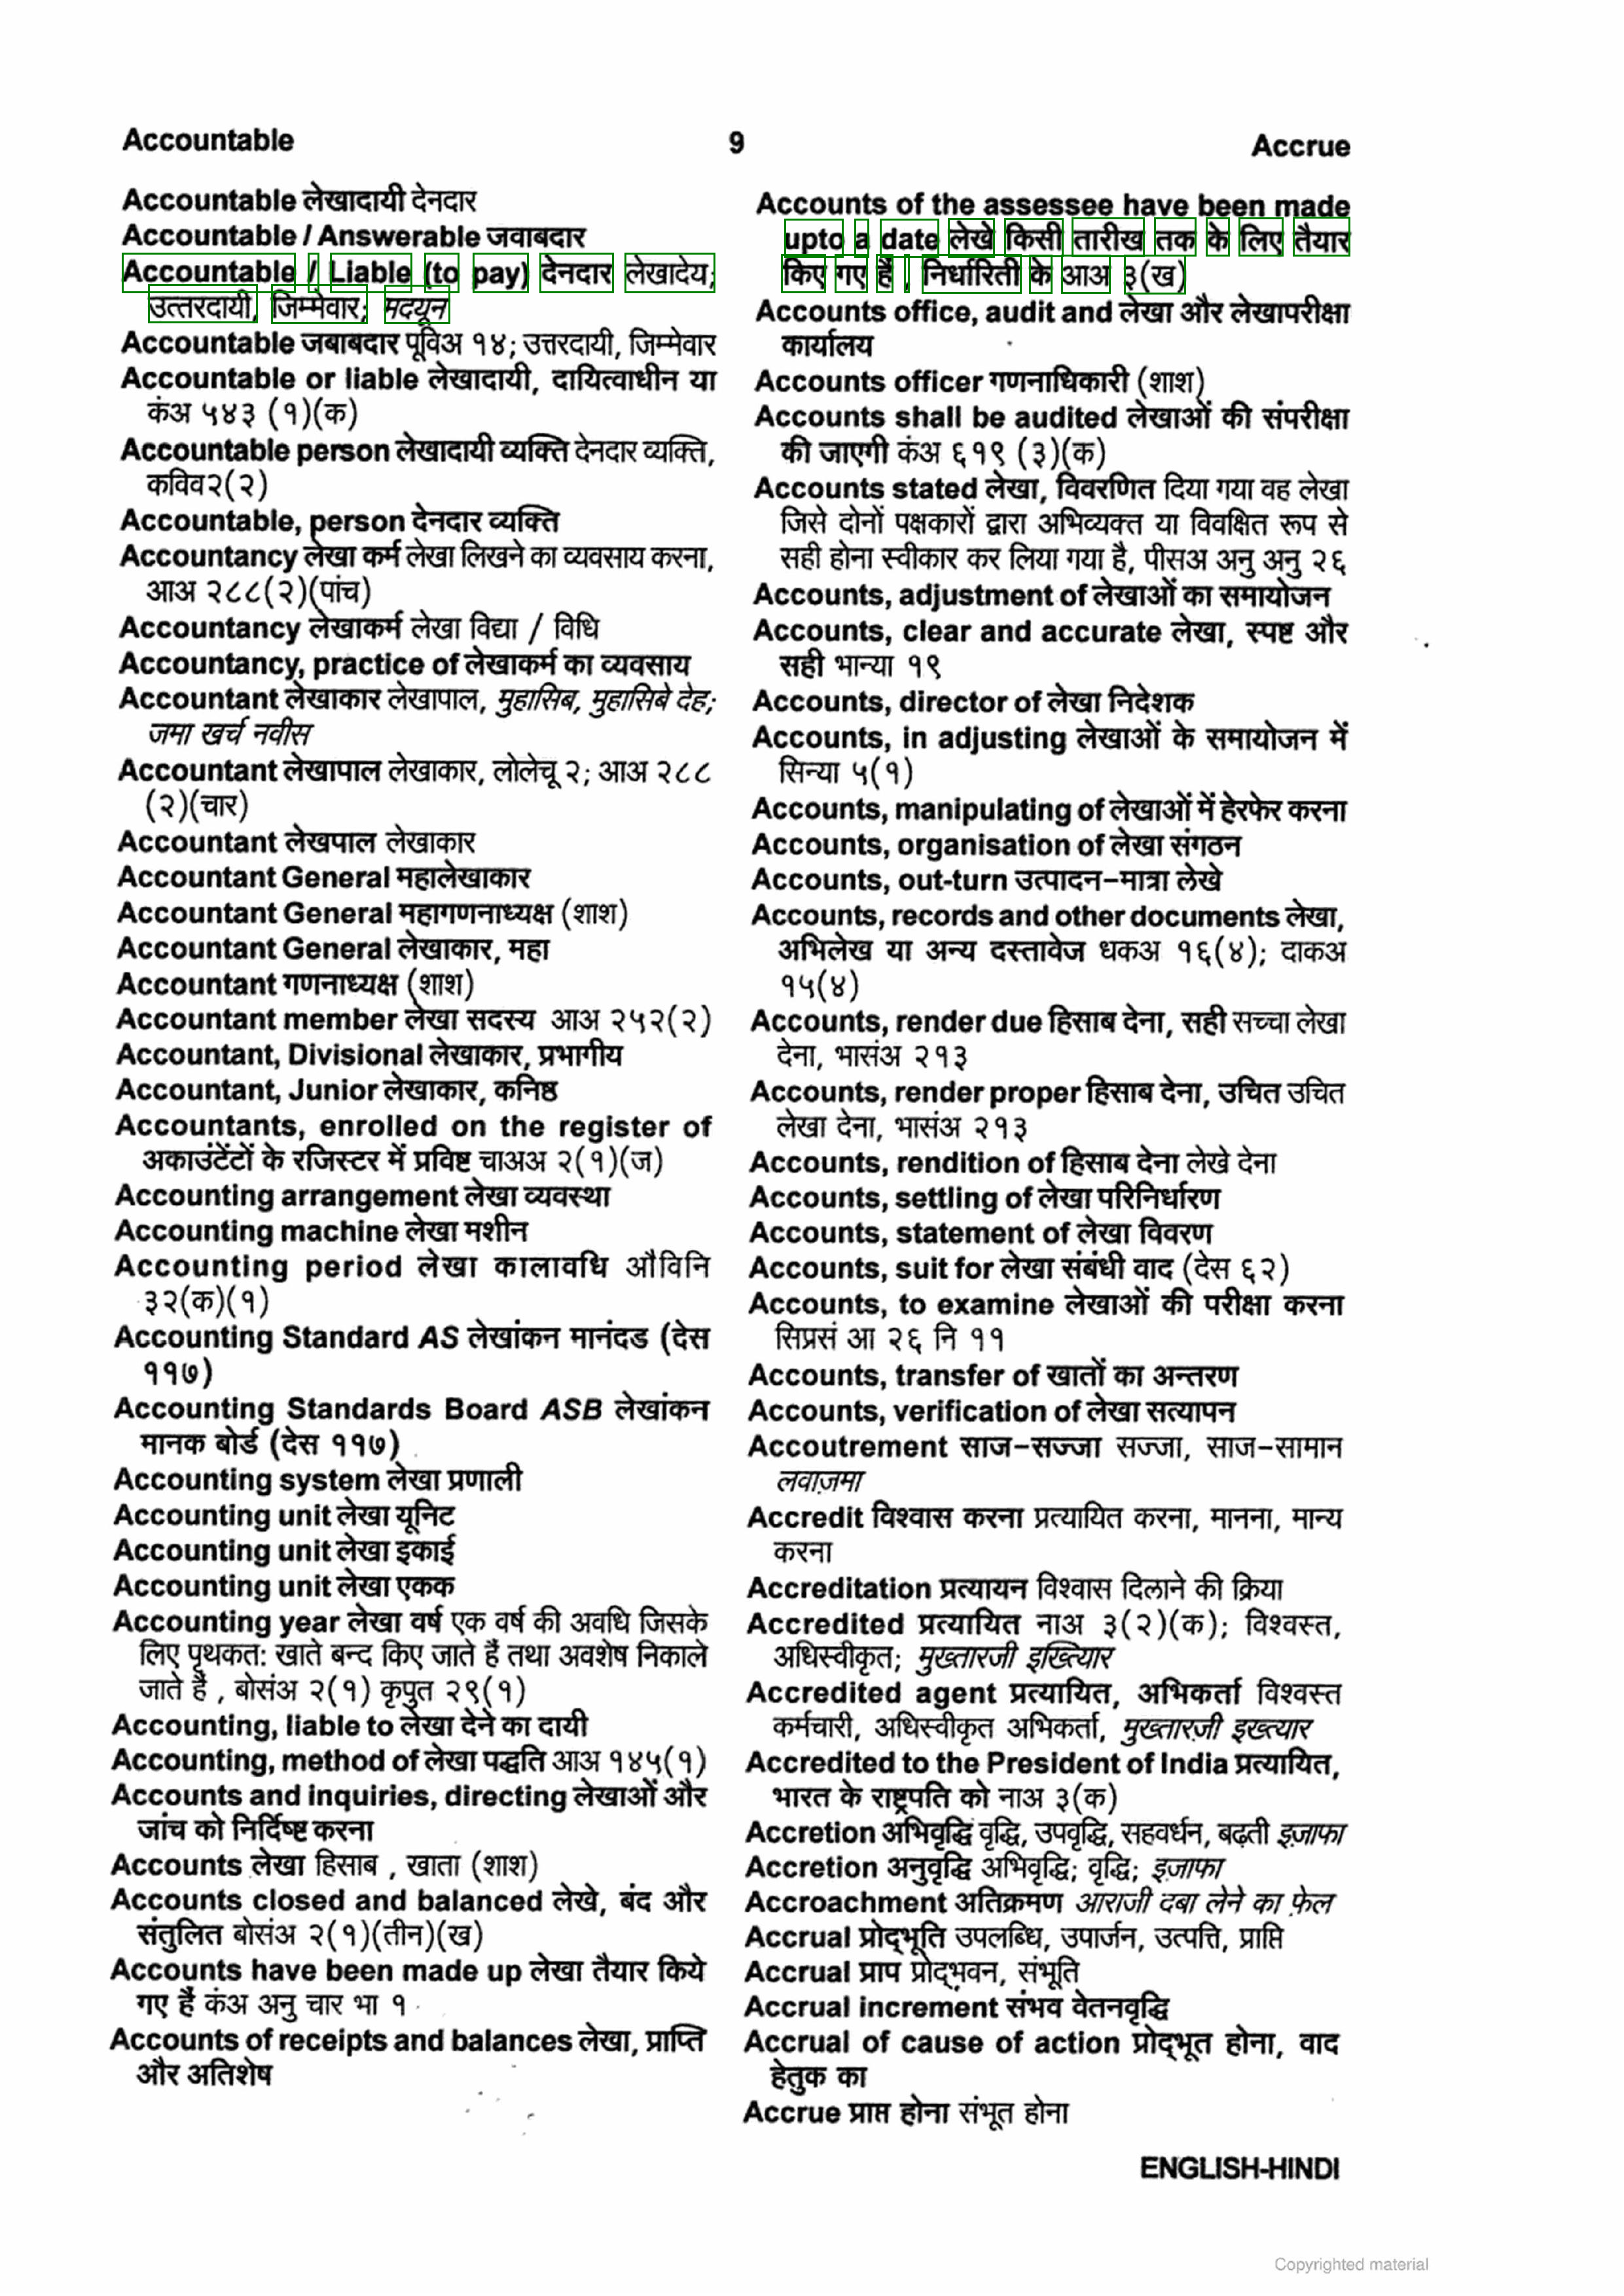

In [58]:
image

In [83]:
import pandas as pd
df = pd.DataFrame(columns =['text_top', 'text_left', 'text_width', 'text_height'])

In [89]:

top =[]; left = []; height =[]; width = []
for idx, i in enumerate(line_coord):
    text_top = i[0]['y']; text_left = i[0]['x']
    text_width = abs(i[1]['x']-i[0]['x']); text_height =abs( i[2]['y']-i[1]['y'])
    top.append(text_top); left.append(text_left)
    height.append(text_height); width.append(text_width)


In [90]:
df['text_left']= left
df['text_top']= top
df['text_width']= width
df['text_height']= height

In [10]:
def are_hlines(df, idx1, idx2, debug=False):
    space = abs(df[idx1][0]['y'] - df[idx2][0]['y'])

    sepration = abs(df[idx1][1]['x'] - df[idx2][0]['x'])
    avg_height = ( abs(df[idx1][0]['y']-df[idx1][2]['y']) +  abs(df[idx2][0]['y']-df[idx2][2]['y']) ) *0.5

    if debug:
        print('are_hlines:: idx1: %d, idx2: %d, space: %d' % (idx1, idx2, space))

    diff_threshold = abs(df[idx1][0]['y']-df[idx1][2]['y']) *0.50

    return ((space <= diff_threshold ) or(sepration <= 3 *avg_height)) and  (sepration < 6 * avg_height) and (space <= diff_threshold *2.5 ) #configs['SUPERSCRIPT_HEIGHT_DIFFERENCE']


In [11]:
def get_ngram(indices, window_size = 2):  
    ngrams = []
    count  = 0
    for token in indices[:len(indices)-window_size+1]:
        ngrams.append(indices[count:count+window_size])  
        count = count+1  
    return ngrams

In [13]:
lines = []
for region in coord:
    ngrams = get_ngram(range(len(region)), window_size = 2)
    line = [region[0]]
    for i in ngrams:
        check = are_hlines(region, i[0], i[1], debug=False)
        if check:
            line.append(region[i[1]])
        else:
            lines.append(line)
            line = [region[i[1]]]
            
            
        

In [17]:
def get_coord(line):
    top_left_x =sys.maxsize ;top_left_y =sys.maxsize; top_right_x = -1;top_right_y = sys.maxsize;
    bottom_left_x =sys.maxsize;bottom_left_y =-1  ; bottom_right_x =-1;bottom_right_y =-1
    for word in line:
        top_left_x = min(top_left_x,word[0]['x']);top_left_y = min(top_left_y,word[0]['y'])
        top_right_x = max(top_right_x,word[1]['x']);top_right_y = min(top_right_y,word[1]['y'])
        bottom_left_x = min(bottom_left_x,word[3]['x']);bottom_left_y = max(bottom_left_y,word[3]['y'])
        bottom_right_x = max(bottom_right_x,word[2]['x']);bottom_right_y = max(bottom_right_y,word[2]['y'])
    lines_coord = []
    lines_coord.append({'x':top_left_x,'y':top_left_y});lines_coord.append({'x':top_right_x,'y':top_right_y})
    lines_coord.append({'x':bottom_right_x,'y':bottom_right_y});lines_coord.append({'x':bottom_left_x,'y':bottom_left_y})
    line_coord.append(lines_coord)  
    return lines_coord
        
        

In [18]:
line_coord =[]
for line in lines:
    lines_coord = get_coord(line)
    line_coord.append(lines_coord)

In [30]:
coord[0]

[[{'x': 1113, 'y': 200},
  {'x': 1136, 'y': 200},
  {'x': 1136, 'y': 231},
  {'x': 1113, 'y': 231}],
 [{'x': 187, 'y': 189},
  {'x': 449, 'y': 189},
  {'x': 449, 'y': 247},
  {'x': 187, 'y': 247}],
 [{'x': 1912, 'y': 200},
  {'x': 2061, 'y': 200},
  {'x': 2061, 'y': 241},
  {'x': 1912, 'y': 241}],
 [{'x': 187, 'y': 276},
  {'x': 452, 'y': 276},
  {'x': 452, 'y': 330},
  {'x': 187, 'y': 330}],
 [{'x': 461, 'y': 274},
  {'x': 620, 'y': 274},
  {'x': 620, 'y': 328},
  {'x': 461, 'y': 328}],
 [{'x': 627, 'y': 273},
  {'x': 728, 'y': 273},
  {'x': 728, 'y': 327},
  {'x': 627, 'y': 327}],
 [{'x': 1158, 'y': 288},
  {'x': 1353, 'y': 288},
  {'x': 1353, 'y': 328},
  {'x': 1158, 'y': 328}],
 [{'x': 1371, 'y': 289},
  {'x': 1415, 'y': 289},
  {'x': 1415, 'y': 328},
  {'x': 1371, 'y': 328}],
 [{'x': 1427, 'y': 289},
  {'x': 1489, 'y': 289},
  {'x': 1489, 'y': 328},
  {'x': 1427, 'y': 328}],
 [{'x': 1507, 'y': 290},
  {'x': 1698, 'y': 290},
  {'x': 1698, 'y': 330},
  {'x': 1507, 'y': 330}],
 [{'x'